In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns
from math import sqrt
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

E:\Programmes\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
dossier = os.getcwd()+'\\'
dossier

In [2]:
data = pd.read_csv("C:/UtilisationTemp/Projet_data_analysis/Python_for_data_analysis/incident_event_log.csv", sep=',', encoding='ANSI')

# 1er regards sur la data

In [3]:
print(data.head(5))

       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify problem_id rfc vendor cause

In [4]:
data.shape

(141712, 36)

In [5]:
data.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

### Nombre de valeurs uniques par colonne

In [6]:
def getUniqueValue(data):
    uniquevalue = []
    for i in list(data): #cherche dans le noms des colonnes
        uniquevalue.append(data[i].nunique())
    return pd.DataFrame(uniquevalue, list(data), columns=['UniqueValue'])
uniquevalue = getUniqueValue(data)
print(uniquevalue[:])

                         UniqueValue
number                         24918
incident_state                     9
active                             2
reassignment_count                28
reopen_count                       9
sys_mod_count                    115
made_sla                           2
caller_id                       5245
opened_by                        208
opened_at                      19849
sys_created_by                   186
sys_created_at                 11553
sys_updated_by                   846
sys_updated_at                 50664
contact_type                       5
location                         225
category                          59
subcategory                      255
u_symptom                        526
cmdb_ci                           51
impact                             3
urgency                            3
priority                           4
assignment_group                  79
assigned_to                      235
knowledge                          2
u

### ... et les occurences de chaques valeurs pour chaques colonnes

In [7]:
#For each col , .value_counts()
for col in data: #.nunique().index
    print(col)
    print(pd.value_counts(data[col]))

number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0009617     2
INC0016927     2
INC0012490     2
INC0010577     2
INC0010824     2
Name: number, Length: 24918, dtype: int64
incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64
active
True     116726
False     24986
Name: active, dtype: int64
reassignment_count
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
26        2
23        2
24        1
25        1
Name: reassignment_count, dtype: int64
re

### Graphs and heatmap

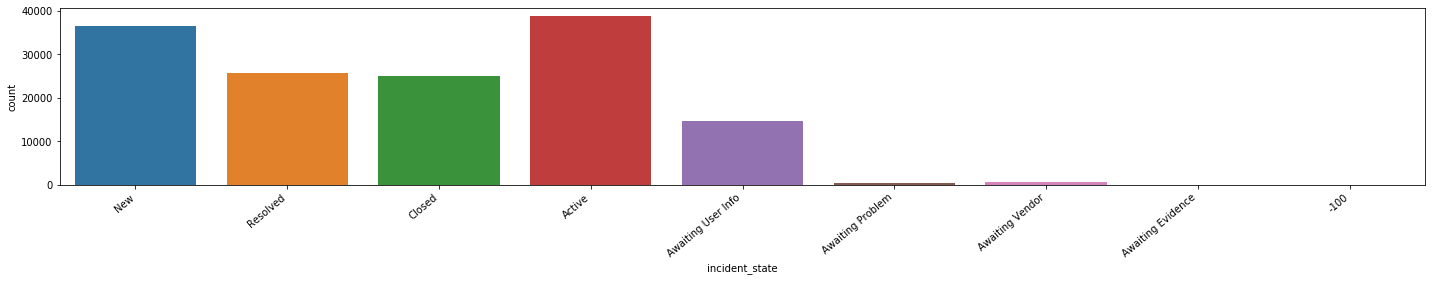

In [8]:
# On affiche la répartition des informations de incident_state
plt.figure(figsize=(20,4))
ax0 = sns.countplot(x = 'incident_state', data=data)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

### Nan ('?') visualisation

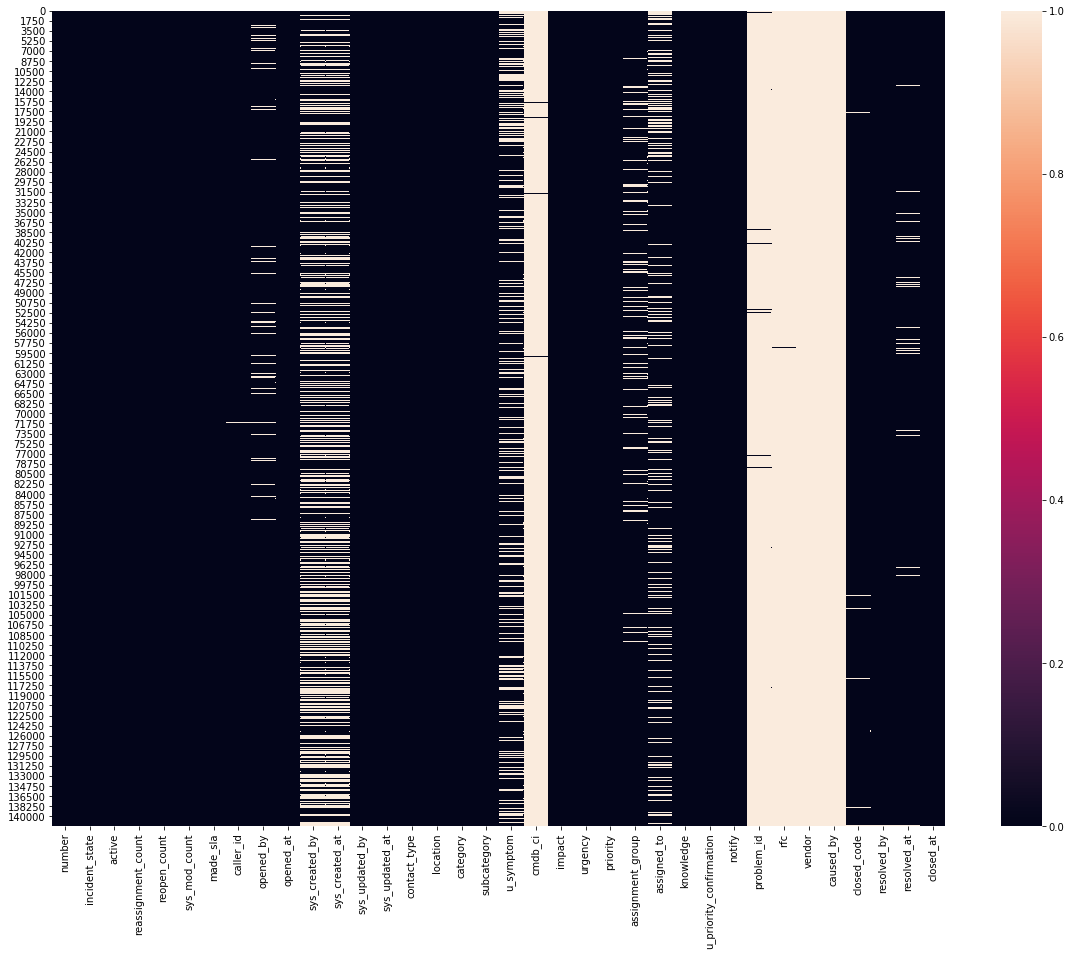

In [11]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data.isin(['?']), ax=ax)

### Création du dataframe pour le calcul de la colonne target time_completion

In [12]:
df_target = pd.DataFrame(data, columns =['opened_at', 'resolved_at'])
df_target.replace('?',np.nan,inplace = True)
df_target.ffill(inplace=True)
data.drop("resolved_at",axis=1,inplace=True)
data.drop("closed_at",axis=1,inplace=True) # drop car très corrélé à resolved_at
df_target

,opened_at,resolved_at
0,29/2/2016 01:16,29/2/2016 11:29
1,29/2/2016 01:16,29/2/2016 11:29
2,29/2/2016 01:16,29/2/2016 11:29
3,29/2/2016 01:16,29/2/2016 11:29
4,29/2/2016 04:40,1/3/2016 09:52
...,...,...
141707,16/2/2017 09:09,16/2/2017 09:53
141708,16/2/2017 14:17,16/2/2017 16:38
141709,16/2/2017 14:17,16/2/2017 16:38
141710,16/2/2017 14:17,16/2/2017 16:38


# Pre processing

### Drop des colonnes "inutiles"

In [13]:
data.drop("number",axis=1,inplace=True)

# Nan très fréquent
data.drop("caused_by",axis=1,inplace=True)
data.drop("rfc",axis=1,inplace=True)
data.drop("problem_id",axis=1,inplace=True)
data.drop("cmdb_ci",axis=1,inplace=True)

### Transformation des colonnes date en plusieurs colonnes jour, mois, année, heure, minute et week_day

In [14]:
# permet d'obtenir le jour de la semaine. 7 valeur possible en fonction du jour (0, 1, 2, 3, 4, 5, 6)
def findDay(date): 
    day = datetime.datetime.strptime(date, '%d %m %Y').weekday()
    return day

In [15]:
# , 'resolved_at', 'closed_at'
for column in ['sys_created_at', 'sys_updated_at', 'opened_at']:
    list_jours = []
    list_mois = []
    list_annee = []
    list_heure = []
    list_min = []
    list_week_day = []

    for index, row in data.iterrows():
        if str(row[column]) != '?':
            date = str(row[column]).split(' ')[0]
            heure_min = str(row[column]).split(' ')[1]
            jour = date.split('/')[0] if int(date.split('/')[0]) > 9 else '0'+date.split('/')[0]
            mois = date.split('/')[1] if int(date.split('/')[1]) > 9 else '0'+date.split('/')[1]
            annee = date.split('/')[2]
            heure = heure_min.split(':')[0]
            minute = heure_min.split(':')[1]
            week_day = findDay("{} {} {}".format(jour, mois, annee))
            
            list_jours.append(jour)
            list_mois.append(mois)
            list_annee.append(annee)
            list_heure.append(heure)
            list_min.append(minute)
            list_week_day.append(week_day)
        else:
            list_jours.append(np.nan)
            list_mois.append(np.nan)
            list_annee.append(np.nan)
            list_heure.append(np.nan)
            list_min.append(np.nan)
            list_week_day.append(np.nan)
        
    data[column + '_day'] = list_jours
    data[column + '_month'] = list_mois
    data[column + '_year'] = list_annee
    data[column + '_hour'] = list_heure
    data[column + '_minute'] = list_min
    data[column + '_week_day'] = list_week_day
    
        
data.drop("sys_created_at",axis=1,inplace=True)
data.drop("sys_updated_at",axis=1,inplace=True)
data.drop("opened_at",axis=1,inplace=True)
# data.drop("resolved_at",axis=1,inplace=True)
# data.drop("closed_at",axis=1,inplace=True)

### Decision des colonnes catégorielles à "dummiser"

In [16]:
# On affiche pour chaque colonnes le nombre de valeurs uniques et le nombre d'occurences de sa valeur la plus fréquente
nbr = []
colzz = []
val = []
for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        unique_cat = len(data[col_name].unique())
        value = "{val} - {nbr}".format(val= data[col_name].value_counts().idxmax(), nbr = data[col_name].value_counts()[0])
        
        val.append(value)
        nbr.append(unique_cat)
        colzz.append(col_name)
        
df_vis_dummies = pd.DataFrame(list(zip(colzz, nbr, val)), 
               columns =['column_name', 'nbr_unique', 'val'])

print(df_vis_dummies.sort_values('nbr_unique'))

              column_name  nbr_unique                      val
31         opened_at_year           2            2016 - 140883
26    sys_updated_at_year           2            2016 - 140775
15                 notify           2   Do Not Notify - 141593
21    sys_created_at_year           3             2016 - 88274
11                urgency           3      2 - Medium - 134094
10                 impact           3      2 - Medium - 134335
12               priority           4    3 - Moderate - 132452
16                 vendor           5               ? - 141468
5            contact_type           5           Phone - 140462
0          incident_state           9           Active - 38716
30        opened_at_month          12               03 - 58012
25   sys_updated_at_month          12               03 - 49820
20   sys_created_at_month          13               03 - 41795
17            closed_code          18           code 6 - 86583
32         opened_at_hour          24               09 

In [17]:
# Visualisation sur toutes les colonnes pour plus de clarté
for col_name in df_vis_dummies.column_name:
    print(data[col_name].value_counts().sort_values(ascending=False).head(10))

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64
Caller 1904    1425
Caller 290      791
Caller 4514     716
Caller 1441     322
Caller 298      293
Caller 3763     270
Caller 93       239
Caller 1531     231
Caller 4414     224
Caller 3160     220
Name: caller_id, dtype: int64
Opened by  17     41466
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
Opened by  40      4915
?                  4835
Opened by  62      4821
Opened by  59      4657
Opened by  501     4178
Name: opened_by, dtype: int64
?                 53076
Created by 10     24223
Created by 13      4511
Created by 62      3943
Created by 52      3551
Created by 34      3468
Created by 20      3364
Created by 30      3347
Created by 89      31

### Avant de "dummiser"... Retrait des str superflue

In [18]:
# Ici on enlève la partie inutile des str.
# Ex : colonne caller_id, valeur : "Caller 2403". On garde uniquement "2403"

cleaner = lambda x,y : x.strip(y).strip()

data.caller_id = data.caller_id.apply(cleaner,y='Caller')
data.opened_by = data.opened_by.apply(cleaner,y='Opened by')
data.sys_created_by = data.opened_by.apply(cleaner,y='Created by')
data.sys_updated_by = data.sys_updated_by.apply(cleaner,y='Updated by')
data.location = data.location.apply(cleaner,y='Location')
data.category = data.category.apply(cleaner,y='Category')
data.subcategory = data.subcategory.apply(cleaner,y='Subcategory')
data.u_symptom = data.u_symptom.apply(cleaner,y="Symptom")
data.assignment_group = data.assignment_group.apply(cleaner,y="Group")
data.assigned_to = data.assigned_to.apply(cleaner,y="Resolver")
data.resolved_by = data.resolved_by.apply(cleaner,y="Resolved by")
#data.cmdb_ci = data.cmdb_ci.apply(cleaner,y="cmdb_ci")   #dropped
#data.problem_id = data.problem_id.apply(cleaner,y="Problem ID")   #dropped
#data.closed_code = data.closed_code.apply(cleaner,y="code")  #categorical feature for dummies

# Medium, Low, High, Moderate, Critical
levels = ["- Medium","- Low","- High","- Moderate","- Critical"]
for level in levels:
    data.impact = data.impact.apply(cleaner,y=level)
    data.urgency = data.urgency.apply(cleaner,y=level)
    data.priority = data.priority.apply(cleaner,y=level)

### Création des colonnes "dummies"

In [19]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x])
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [20]:
todummy_list = ['incident_state', 'contact_type', 'closed_code', 'vendor', 'notify']
data.closed_code = data.closed_code.replace('?', 'Other_code')
data.vendor = data.vendor.replace('?', 'Other_vendor')

# Ici on renomme les variables pour que le titre des colonnes créées n'ont pas d'espace
replacer = lambda x : x.replace(' ','_')

data.incident_state = data.incident_state.replace('-100', 'Other_incident_state')
data.incident_state = data.incident_state.apply(replacer)
data.incident_state = data.incident_state.apply(replacer)
data.incident_state = data.incident_state.replace('Active','Active_State')
data.contact_type = data.contact_type.apply(replacer)
data.closed_code = data.closed_code.apply(replacer)
data.vendor = data.vendor.apply(replacer)
data.notify = data.notify.apply(replacer)


data = dummy_df(data, todummy_list)

### Handling Nan ('?')

In [21]:
data.replace('?',np.nan,inplace = True)

In [22]:
data.sys_created_at_day.ffill(inplace=True)
data.sys_created_at_month.ffill(inplace=True)
data.sys_created_at_year.ffill(inplace=True)
data.sys_created_at_hour.ffill(inplace=True)
data.sys_created_at_minute.ffill(inplace=True)

In [23]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data.values)
data = pd.DataFrame(data=imp.transform(data.values),columns=data.columns)

In [24]:
for (columnName, columnData) in data.iteritems():
    inter = False
    if '?' in columnData.values:
        print(columnName + '?')

### Boolean into 0 1

In [25]:
data = data.replace([True,False],[1,0])

### Creation de la colonne target

In [26]:
time_completions = list()   

def make_time_completion(row):   
    cols = ['opened_at','resolved_at']
    str_opened_at = ""
    str_closed_at = ""
    for col in cols:
        date = str(row[col]).split()[0]
        jour = date.split('/')[0] if int(date.split('/')[0]) > 9 else '0'+date.split('/')[0]
        mois = date.split('/')[1] if int(date.split('/')[1]) > 9 else '0'+date.split('/')[1]
        annee = date.split('/')[2]
        if col == 'opened_at':
            str_opened_at = jour+'/'+mois+'/'+annee+' '+str(row[col]).split()[1]
        else :
            str_closed_at = jour+'/'+mois+'/'+annee+' '+str(row[col]).split()[1]
    opened_at = pd.to_datetime(str_opened_at,format="%d/%m/%Y %H:%M")
    closed_at = pd.to_datetime(str_closed_at,format="%d/%m/%Y %H:%M")
    time_completion_val = (closed_at-opened_at).seconds/60
    time_completions.append(time_completion_val)
for index, row in df_target.iterrows():
    make_time_completion(row)

In [27]:
y = pd.DataFrame(time_completions, columns =['time_completions'])
y

,time_completions
0,613.0
1,613.0
2,613.0
3,613.0
4,312.0
...,...
141707,44.0
141708,141.0
141709,141.0
141710,141.0


### Convert to numeric

In [28]:
data = data.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

In [29]:
# drop les colonnes de date opened_at et resolved_at car elles sont trop corrélée a la target
# data.drop("closed_at_day",axis=1,inplace=True)
# data.drop("closed_at_hour",axis=1,inplace=True)
# data.drop("closed_at_minute",axis=1,inplace=True)
# data.drop("closed_at_month",axis=1,inplace=True)
# data.drop("closed_at_year",axis=1,inplace=True)
# data.drop("closed_at_week_day",axis=1,inplace=True)

# data.drop("resolved_at_day",axis=1,inplace=True)
# data.drop("resolved_at_hour",axis=1,inplace=True)
# data.drop("resolved_at_minute",axis=1,inplace=True)
# data.drop("resolved_at_month",axis=1,inplace=True)
# data.drop("resolved_at_year",axis=1,inplace=True)
# data.drop("resolved_at_week_day",axis=1,inplace=True)

### Corrélation

Text(0.5, 1, 'Correlation')

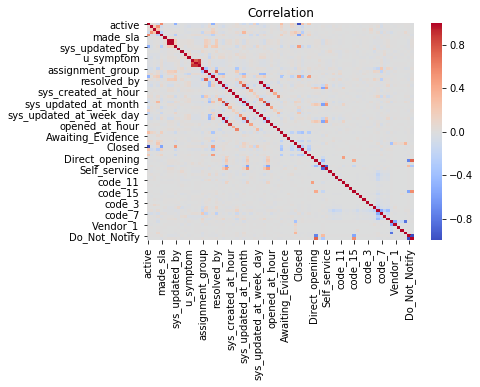

In [30]:
corr = data.corr()
sns.heatmap(corr,cmap='coolwarm')
plt.title('Correlation')

E:\Programmes\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


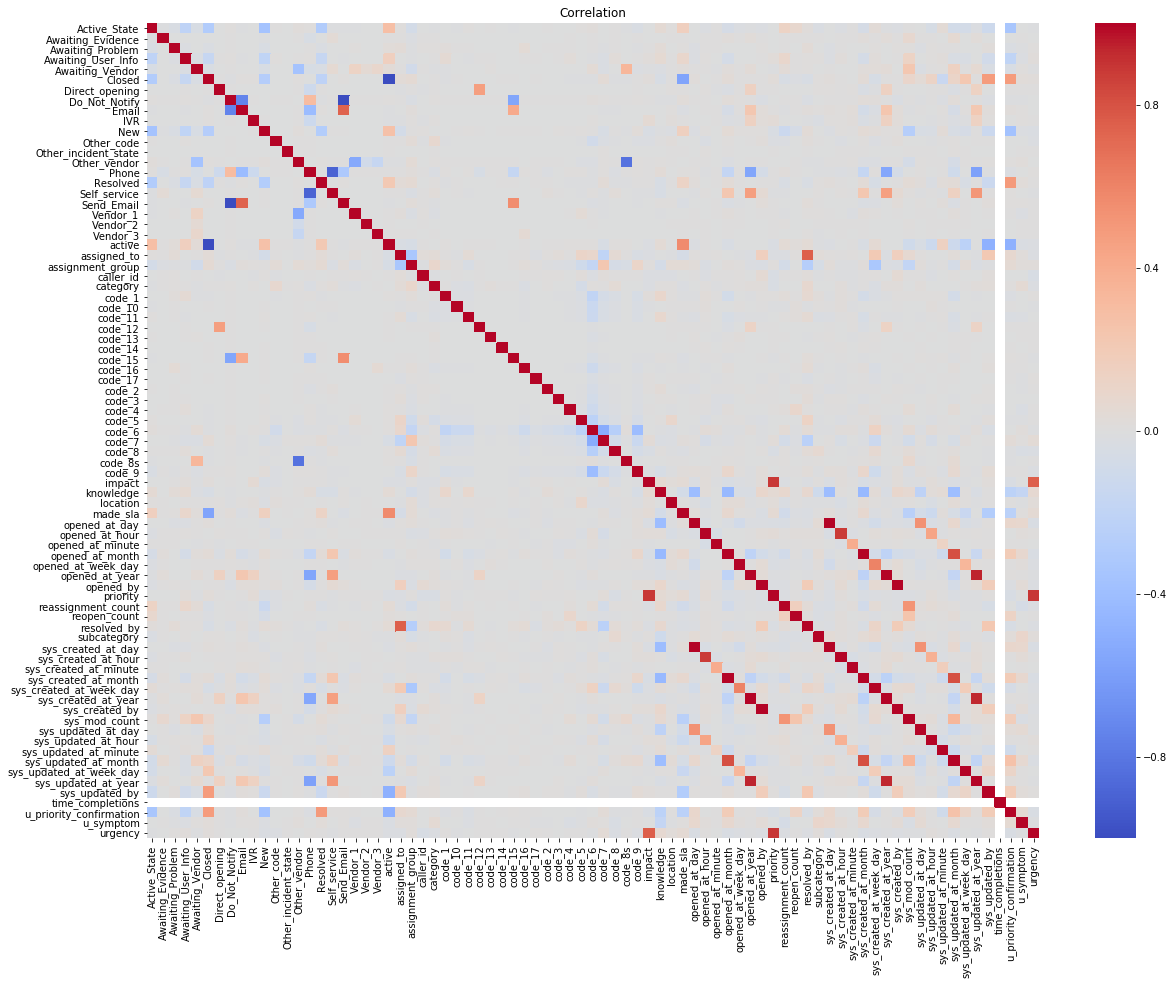

In [31]:
df_with_target = pd.concat([data,y])
corr1 = df_with_target.corr()

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr1,cmap='coolwarm', ax= ax)
plt.title('Correlation')
plt.show()

# Models

In [32]:
#y = np.ravel(pd.DataFrame(time_completions))
# y = pd.DataFrame(time_completions)
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.2)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113369, 78), (28343, 78), (113369, 1), (28343, 1))

In [34]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lr = LinearRegression()
ada = AdaBoostRegressor()
etr = ExtraTreesRegressor() # meilleures resultats ici
dtr = DecisionTreeRegressor()

### Models launch

In [35]:
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)
lr.fit(X_train, y_train)
ada.fit(X_train, y_train)
etr.fit(X_train, y_train)
dtr.fit(X_train, y_train)

E:\Programmes\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Programmes\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
E:\Programmes\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programmes\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
print(rfr.score(X_test, y_test),gbr.score(X_test, y_test),lr.score(X_test, y_test),ada.score(X_test, y_test), etr.score(X_test, y_test), dtr.score(X_test, y_test))

0.687179852109536 0.3510046141614911 0.18742604785534608 0.1919876978082199 0.7677115957544932 0.4176162766876671


### Grid Search

In [ ]:
extraTrees_params = {
    'n_estimators': range(10,110,10)
}

grid_search_extraT = GridSearchCV(estimator = rfr, verbose = 5, n_jobs = 5, param_grid = extraTrees_params)
grid_search_extraT.fit(X_train, y_train)

print("meilleur: {} avec {}".format(grid_search_extraT.best_score_, grid_search_extraT.best_params_))

In [49]:
extraTrees_params = {
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None],
    'min_samples_split': range(2,7,2),
    'min_samples_leaf': range(1,4,1)
}

grid_search_extraT = GridSearchCV(estimator = rfr, verbose = 5, n_jobs = 5, param_grid = extraTrees_params)
grid_search_extraT.fit(X_train, y_train)

print("meilleur: {} avec {}".format(grid_search_extraT.best_score_, grid_search_extraT.best_params_))

E:\Programmes\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done  54 out of  54 | elapsed: 10.5min finished
E:\Programmes\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


meilleur: 0.6567856540188137 avec {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


In [50]:
etr = ExtraTreesRegressor(max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 80)
etr.fit(X_train, y_train)

E:\Programmes\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

### Poid de chaque feature

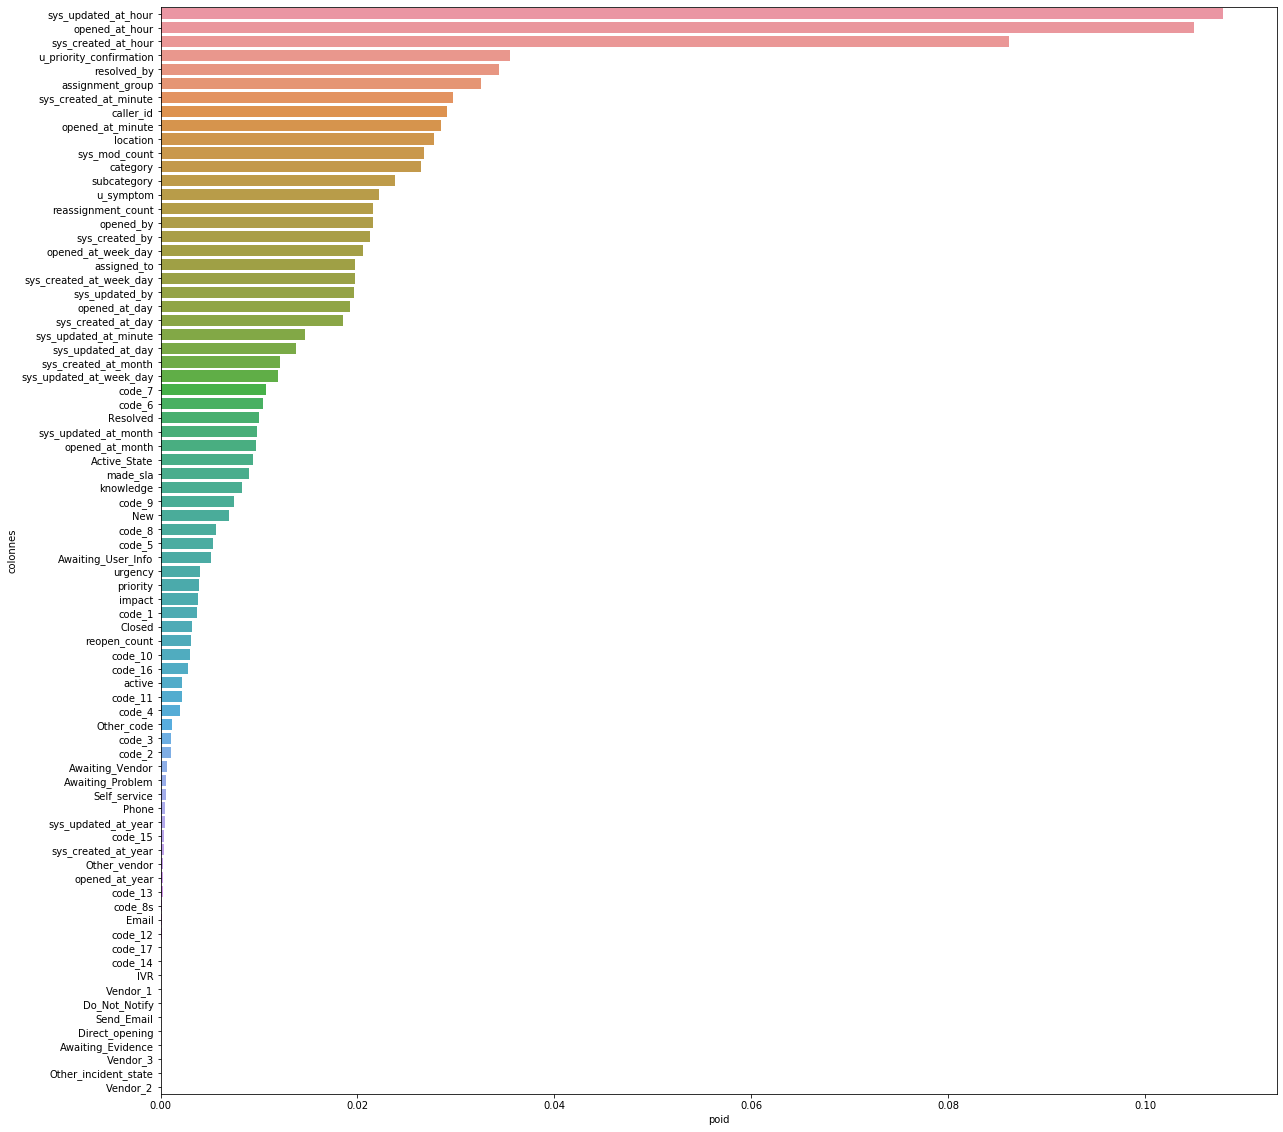

In [37]:
poid_feature = pd.DataFrame({'colonnes':data.columns, 'poid': etr.feature_importances_})
poid_feature = poid_feature.sort_values("poid",ascending=False)

fig,ax = plt.subplots(figsize=(20,20))
sns.barplot(x="poid", y="colonnes", data=poid_feature)

### Comparaison des modèles

In [51]:
def graphModele(rfr,gbr,lr,ada,etr,dtr,X,y,T):
    mod = pd.DataFrame({'Random Forest': rfr.score(X, y),
                        'Gradient Boosting' : gbr.score(X, y),
                        'Linear Regression': lr.score(X, y),
                        'Ada Boost': ada.score(X, y),
                        'Extra Trees': etr.score(X, y),
                        'Decision Tree': dtr.score(X, y)
                        }, index=[0])
    plt.figure(figsize=(10,5))
    sns.barplot(data=mod)
    plt.title("Scores pour {}".format(T))


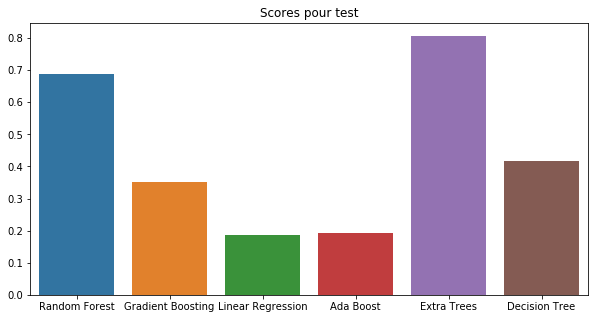

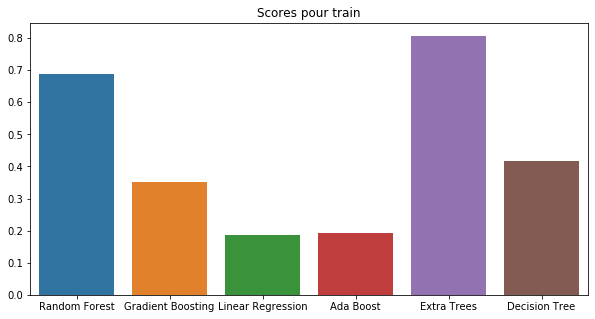

In [52]:
graphModele(rfr,gbr,lr,ada,etr,dtr,X_test,y_test,"test")
graphModele(rfr,gbr,lr,ada,etr,dtr,X_test,y_test,"train")

### MSE

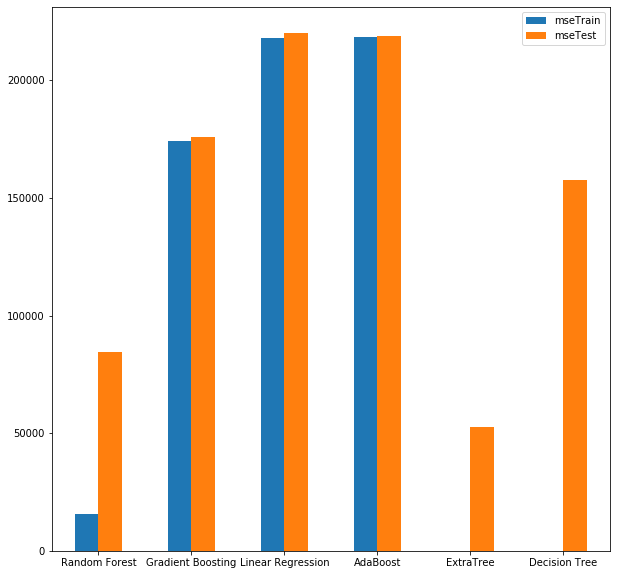

In [53]:
#test
mse_rf = mean_squared_error(y_test, rfr.predict(X_test))
mse_gb = mean_squared_error(y_test, gbr.predict(X_test))
mse_lr = mean_squared_error(y_test, lr.predict(X_test))
mse_ada = mean_squared_error(y_test, ada.predict(X_test))
mse_etr = mean_squared_error(y_test, etr.predict(X_test))
mse_dtr = mean_squared_error(y_test, dtr.predict(X_test))
#train
mse_rf2 = mean_squared_error(y_train, rfr.predict(X_train))
mse_gb2 = mean_squared_error(y_train, gbr.predict(X_train))
mse_lr2 = mean_squared_error(y_train, lr.predict(X_train))
mse_ada2 = mean_squared_error(y_train, ada.predict(X_train))
mse_etr2 = mean_squared_error(y_train, etr.predict(X_train))
mse_dtr2 = mean_squared_error(y_train, dtr.predict(X_train))


mseTrain = [mse_rf2, mse_gb2, mse_lr2, mse_ada2, mse_etr2, mse_dtr2]
mseTest = [mse_rf, mse_gb, mse_lr, mse_ada, mse_etr, mse_dtr]
index = ['Random Forest', 'Gradient Boosting', 'Linear Regression',
         'AdaBoost', 'ExtraTree', 'Decision Tree']
df = pd.DataFrame({'mseTrain': mseTrain,
                   'mseTest': mseTest}, index=index)
ax = df.plot.bar(rot=0, figsize = (10,10))

### Predictions

In [ ]:
df_pred = pd.DataFrame()
df_pred["prediction"] = rfr.predict(X_test)
df_pred["reel"] = y_test # je n'arrive pas à comprendre pourquoi cette colonne contient beaucoup de Nan, y_test n'en contient pas pourtant...
df_pred["diff"] = df_pred.reel-df_pred.prediction
df_pred["pct_diff"] = (df_pred.reel-df_pred.prediction)/df_pred.reel
df_pred

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_pred.isna(), ax=ax)

In [58]:
path_to_model = "C:/UtilisationTemp/Projet_data_analysis/Python_for_data_analysis/model_extraTrees.pkl"

In [63]:
path_where_to_save =  "C:/UtilisationTemp/Projet_data_analysis/Python_for_data_analysis/model_extraTrees.pkl"
joblib.dump(etr, path_where_to_save)

['C:/UtilisationTemp/Projet_data_analysis/Python_for_data_analysis/model_extraTrees.pkl']

In [62]:
dict(data.iloc[0])

{'active': 1,
 'reassignment_count': 0,
 'reopen_count': 0,
 'sys_mod_count': 0,
 'made_sla': 1,
 'caller_id': 2403,
 'opened_by': 8,
 'sys_created_by': 8,
 'sys_updated_by': 21,
 'location': 143,
 'category': 55,
 'subcategory': 170,
 'u_symptom': 72,
 'impact': 2,
 'urgency': 2,
 'priority': 3,
 'assignment_group': 56,
 'assigned_to': 17,
 'knowledge': 1,
 'u_priority_confirmation': 0,
 'resolved_by': 149,
 'sys_created_at_day': 29,
 'sys_created_at_month': 2,
 'sys_created_at_year': 2016,
 'sys_created_at_hour': 1,
 'sys_created_at_minute': 23,
 'sys_created_at_week_day': 0,
 'sys_updated_at_day': 29,
 'sys_updated_at_month': 2,
 'sys_updated_at_year': 2016,
 'sys_updated_at_hour': 1,
 'sys_updated_at_minute': 23,
 'sys_updated_at_week_day': 0,
 'opened_at_day': 29,
 'opened_at_month': 2,
 'opened_at_year': 2016,
 'opened_at_hour': 1,
 'opened_at_minute': 16,
 'opened_at_week_day': 0,
 'Active_State': 0,
 'Awaiting_Evidence': 0,
 'Awaiting_Problem': 0,
 'Awaiting_User_Info': 0,
 'Aw

In [ ]:
data.to_csv(r'E:\Temp\Doc\incidents.csv')